In [762]:
## Mehrnoosh Hasanzade ****************
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats as st
import scipy.stats as stats
import patsy
import itertools
from IPython.display import display, HTML

from ipywidgets import interact
import ipywidgets as widgets
import warnings
from math import sqrt
from itertools import product

from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


from math import sqrt
from sklearn.dummy import DummyClassifier
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
# from tensorflow_addons import losses
# import tensorflow_addons as tfa
# import tensorflow as tf
# from tensorflow import keras

%matplotlib inline
plt.style.use('seaborn-white')

In [1]:
# pip install imbalanced-learn
# pip install tensorflow
# pip install — ignore-installed — upgrade tensorflow

In [95]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [763]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [1014]:
sale_hist = pd.read_csv('C:/Users/mehrn/OneDrive/Desktop/ML/HelloWorld/SaleHistory.csv')
call_hist = pd.read_csv('C:/Users/mehrn/OneDrive/Desktop/ML/HelloWorld/OBCallHistory.csv')
customer_hist = pd.read_csv('C:/Users/mehrn/OneDrive/Desktop/ML/HelloWorld/CustomerHistory.csv')

In [1015]:
print('call_hist', call_hist.shape)
print('sale_hist', sale_hist.shape)
print('customer_hist', customer_hist.shape)

call_hist (7998, 5)
sale_hist (5610, 4)
customer_hist (12010, 51)


In [1016]:
call_hist.isnull().sum()

PhoneNumber_hashed       0
OBCallDateTime           0
Contacted                0
advocate_id              0
CallDuration          1720
dtype: int64

In [1017]:
sale_hist.isnull().sum()

userid          0
saledatetime    0
StickerPrice    0
Odometer        0
dtype: int64

In [1018]:
customer_hist.isnull().sum()

userid                        0
AttributedEmail               0
EmailVerified                 0
GeneratedTerms                0
HasBureauError                0
HasStartedPurchase            0
InboundCall                   0
InboundChat                   0
InboundEmail                  0
IsDealSeeker                  0
IsDirtLover                   0
IsDreamer                     0
IsGreen                       0
IsResearcher                  0
MultipleEmail                 0
OutboundEmail                 0
ReferralAttachment            0
TradeInValueGenerated         0
InboundCallCount              0
InboundChatCount              0
InboundEmailCount             0
OutboundCallCount             0
OutboundEmailCount            0
TotalInboundCallLength        0
BureauIncome                  0
CreditScore1                  0
CreditScore2                  0
DeviceCount                   0
FraudScore                    0
Income                        0
MedianVehicleFuelEcon         0
MedianVe

In [1019]:
df_combine = customer_hist.merge(sale_hist, how='left', left_on='userid', right_on='userid')
# df_combine.info()
print('df_combine', df_combine.shape)
# df_combine.head(24)

df_combine (12010, 54)


In [1020]:
df = pd.DataFrame(df_combine.merge(call_hist, how='left', left_on='PhoneNumber_hashed', right_on='PhoneNumber_hashed'))
# df.info()
print('df', df.shape)

df (12010, 58)


In [1021]:
df.isnull().sum()

userid                        0
AttributedEmail               0
EmailVerified                 0
GeneratedTerms                0
HasBureauError                0
HasStartedPurchase            0
InboundCall                   0
InboundChat                   0
InboundEmail                  0
IsDealSeeker                  0
IsDirtLover                   0
IsDreamer                     0
IsGreen                       0
IsResearcher                  0
MultipleEmail                 0
OutboundEmail                 0
ReferralAttachment            0
TradeInValueGenerated         0
InboundCallCount              0
InboundChatCount              0
InboundEmailCount             0
OutboundCallCount             0
OutboundEmailCount            0
TotalInboundCallLength        0
BureauIncome                  0
CreditScore1                  0
CreditScore2                  0
DeviceCount                   0
FraudScore                    0
Income                        0
MedianVehicleFuelEcon         0
MedianVe

In [1022]:
#check for duplication in data
x = df.PhoneNumber_hashed
y = x.duplicated(keep= 'first')

if len(y)==len(df):
    print("There is no duplication in observations")
    
x = df.userid
y = x.duplicated(keep= 'first')

if len(y)==len(df):
    print("There is no duplication in observations")

There is no duplication in observations
There is no duplication in observations


In [1023]:
df['CallDuration'] = df['CallDuration'].fillna(0)
df['CallDuration'].isnull().sum()

0

In [1024]:
#deleting the outlier
# df[df['age']>100]
# df = df[df['age']<100]

In [1025]:
#2. Variable sold
# datetime.strptime("28FEB2018:10:06:33.17", "%d%b%Y:%H:%M:%S.%f")
fmt = '%d%b%Y:%H:%M:%S.%f'
df['saledatetime_as_time_format'] = pd.to_datetime(df['saledatetime'], format= fmt)
df['accountcreationdatetime_as_time_format'] = pd.to_datetime(df['accountcreationdatetime'], format=fmt)
df['duration'] = df['saledatetime_as_time_format']  - df['accountcreationdatetime_as_time_format']

df['sold'] = ""

for i in range(len(df.duration)):
    
    if df.duration[i].days> 45:
        df.sold[i]= 0
    else:
        df.sold[i]= 1

# print(df.sold)

In [1026]:
#3. Variable high_credit

df['high_credit'] = ""
med = df['CreditScore1'].median()

for i in range(len(df)):
    
    if df.CreditScore1[i]> med :
        df.high_credit[i] = 1
    else:
        df.high_credit[i] = 0

        
print('high_credit', len(df.high_credit))

high_credit 12010


In [1027]:
#4.

# Variable high_income
df['high_income'] = ""
eighty_percentile = df.Income.quantile(.80)

for i in range(len(df)):
    if df.Income[i] > eighty_percentile:
        df.high_income[i] = 1
    else:
        df.high_income[i] = 0  
        

print(eighty_percentile)
print('high_income', len(df.high_income))

64687.2
high_income 12010


In [1028]:

print(df.sold.isnull().sum())
print(df.Contacted.isnull().sum())
print(len(df.Contacted))

0
4012
12010


In [1029]:
#5. Sale conversion rates of customers:

count_not_attempted = df.Contacted.isnull().sum()
print('We did not attempt to call {} customers.'.format(count_not_attempted))
#     print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))


count_attempted = len(df.Contacted)- count_not_attempted #contacted ==1 or contacted==0
print('We attempted to call {} customers.'.format(count_attempted))

count_contacted = df.Contacted.sum().astype(int) #contacted==1
print('We actuallt contacted and talked with {} customers.'.format(count_contacted))


We did not attempt to call 4012 customers.
We attempted to call 7998 customers.
We actuallt contacted and talked with 6278 customers.


In [1030]:
print(df.Contacted[0], ': is this null?',df.Contacted.isnull()[0])
print(df.Contacted[1], ': is this null?',df.Contacted.isnull()[1])
print(df.Contacted[4], ': is this null?',df.Contacted.isnull()[4])

nan : is this null? True
1.0 : is this null? False
0.0 : is this null? False


In [1031]:
contacted_sold = 0
not_attempted_sold = 0
attempted_sold = 0

for i in range(len(df)):
    if df.sold[i] ==1 and df.Contacted[i] ==1:
        contacted_sold += 1
        
    if df.sold[i] ==1 and df.Contacted.isnull()[i] ==False:
        attempted_sold += 1
        
    if df.sold[i] ==1 and df.Contacted.isnull()[i] ==True:
        not_attempted_sold += 1
        
contacted_rate = (contacted_sold /count_contacted)*100
attempted_rate = (attempted_sold/count_attempted)*100
not_attempted_rate = (not_attempted_sold/count_not_attempted)*100

display(HTML('<h4>Sale Conversion Rates: </h4>'))

print('Contacted Rate = ', contacted_rate)
print('Attempted Rate = ', attempted_rate)
print('Not Attempted Rate = ', not_attempted_rate)        

Contacted Rate =  89.8215992354253
Attempted Rate =  90.7101775443861
Not Attempted Rate =  92.84646061814557


In [1032]:
#6
df['attempted'] = ""
 
# for i in range(len(df)):
#     if df.Contacted.isnull()[i] ==True :
#         df.att[i] = "N"      
#     else:
#         df.att[i] = "A"
        
df['attempted'][df.Contacted.isnull() ==True] = 'N'
df['attempted'][df.Contacted.isnull() ==False] = 'A'

display(HTML('<h4>Check for varinace in 2 groups</h4>'))
print(np.var(df.loc[df['attempted'] == 'A', 'sold']))
print(np.var(df.loc[df['attempted'] == 'N', 'sold']))

display(HTML('<h4>Tow sample t-test </h4>'))
a = df.loc[df['attempted'] == 'A', 'sold'].to_numpy()
b = df.loc[df['attempted'] == 'N', 'sold'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=False)


0.0842681444304562
0.06641808124977014


Ttest_indResult(statistic=-4.103954901543423, pvalue=4.0976021734507716e-05)

In [1033]:
display(HTML('<h4>Tow sample t-test result shows that there is a mean difference between 2 samples. So, the diffrenece is not by chance! </h4>'))


In [1034]:
#7 ---------------------------------------------------------------------------------

#creat a column for call sale conversion 
ttest_data =zip(df.Contacted, df.sold, df.high_credit, df.high_income)
ttest_data = pd.DataFrame(ttest_data, columns = ['Contacted', 'sold', 'high_credit','high_income'])
ttest_data = ttest_data.dropna().reset_index() 
assert ttest_data.isna().sum().sum() == 0

ttest_data['contacted_sale'] = ""
ttest_data['hcredit'] = ""
ttest_data['hincome'] = ""

for i in range(len(ttest_data)):
    if ttest_data.Contacted[i]== 1 and ttest_data.sold[i]==1 :
        ttest_data.contacted_sale[i] =1   
    if ttest_data.Contacted[i]== 1 and ttest_data.sold[i]==0 :
        ttest_data.contacted_sale[i] =0 
        
for i in range(len(ttest_data)):
    if ttest_data.Contacted[i]== 1 and ttest_data.high_credit[i] == 1:
        ttest_data.hcredit[i] = "A"   
    if ttest_data.Contacted[i]== 1 and ttest_data.high_credit[i] == 0:
        ttest_data.hcredit[i] = "N"   
        
for i in range(len(ttest_data)):
    if ttest_data.Contacted[i]== 1 and ttest_data.high_income[i] == 1:
        ttest_data.hincome[i] = "A"   
    if ttest_data.Contacted[i]== 1 and ttest_data.high_income[i] == 0:
        ttest_data.hincome[i] = "N"   
# creat  a new daraframe with these 3 lists



In [1035]:
ttest_data

,index,Contacted,sold,high_credit,high_income,contacted_sale,hcredit,hincome
0,1,1.0,1,0,0,1,N,N
1,2,1.0,1,0,0,1,N,N
2,3,1.0,1,0,0,1,N,N
3,4,0.0,1,1,0,,,
4,7,1.0,1,1,0,1,A,N
...,...,...,...,...,...,...,...,...
7993,12004,0.0,1,1,1,,,
7994,12005,1.0,1,0,1,1,N,A
7995,12006,1.0,0,1,0,0,A,N
7996,12008,1.0,1,1,0,1,A,N


In [1036]:
display(HTML('<h4>Tow sample t-test for high_credit</h4>'))
 
a = ttest_data.loc[ttest_data['hcredit'] == 'A', 'contacted_sale'].to_numpy()
b = ttest_data.loc[ttest_data['hcredit'] == 'N', 'contacted_sale'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=False)


Ttest_indResult(statistic=0.6869199085097591, pvalue=0.49215860944533607)

In [1037]:
display(HTML('<h4>Tow sample t-test for high_income</h4>'))

a = ttest_data.loc[ttest_data['hincome'] == 'A', 'contacted_sale'].to_numpy()
b = ttest_data.loc[ttest_data['hincome'] == 'N', 'contacted_sale'].to_numpy()
st.ttest_ind(a=a, b=b, equal_var=False)

Ttest_indResult(statistic=1.3980606767691002, pvalue=0.1622481686024899)

<AxesSubplot:xlabel='contacted_sale', ylabel='count'>

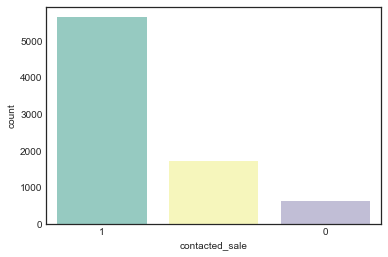

In [1038]:
sns.countplot(x='contacted_sale', data =ttest_data, palette = 'Set3' )

In [1039]:
#save the main data frame
main_df = df


<AxesSubplot:xlabel='sold', ylabel='count'>

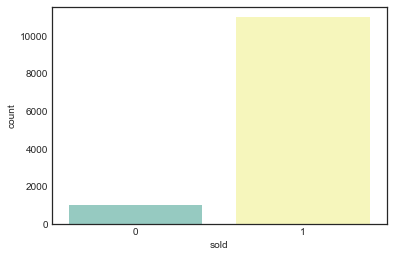

In [1040]:
#investigating the distribution of y
sns.countplot(x='sold', data =df,palette = 'Set3' )

In [1041]:
# 8 ----------------------------------------------------------------------------------

# #converting data typ object to type numeric

df['sold'] = pd.to_numeric(df['sold'])
df['high_income'] = pd.to_numeric(df['high_income'])
df['high_credit'] = pd.to_numeric(df['high_credit'])
# df['attempted'] = pd.to_numeric(df['attempted'])

In [1042]:
#Feature Selection
df = df.drop(['userid', 'MedianVehicleFuelEcon', 'MedianVehicleMileage', 'TradeInValueAmount',
        'ModeDeviceType', 'ModeVehicleType', 'PhoneType', 'ServiceProvider','accountcreationdatetime', 'TotalInboundCallLength',
        'PhoneNumber_hashed','OBCallDateTime', 'advocate_id', 'CallDuration', 'saledatetime', 'StickerPrice','Odometer',
        'MedianVehiclePrice','saledatetime_as_time_format', 'accountcreationdatetime_as_time_format', 'duration',
              'VehicleVelocity1', 'VehicleVelocity15', 'CreditScore1', 'Income', 'InboundCallContact', 'attempted'], axis=1)


In [1043]:
# First: Making categorical variables into numeric representation
df= pd.get_dummies(df, columns = ['AgeCategory',  'CensusGeoRegionAddress', 'LeadSource'])

In [1044]:
main_df = df
new_data = df

In [1045]:
new_data = new_data.dropna().reset_index() 
new_data = new_data.drop(['index'], axis=1)

In [1046]:
new_data.shape

(7998, 47)

In [1047]:
# Scaling our columns
# It makes my ML model tun faster and also it can (sometimes) improve the model accuracy because we normalize
#the distribution of our input

scale_vars = ['InboundCallCount', 'InboundEmailCount', 'OutboundCallCount','OutboundEmailCount','CreditScore2',
              'DeviceCount','FraudScore', 'NumberSavedVehicles',
              'NumberSearches', 'UniqueModels', 'ClicksQuintile']
scaler = MinMaxScaler()
new_data[scale_vars] = scaler.fit_transform(new_data[scale_vars])
new_data.head()

,AttributedEmail,EmailVerified,GeneratedTerms,HasBureauError,HasStartedPurchase,InboundCall,InboundChat,InboundEmail,IsDealSeeker,IsDirtLover,...,AgeCategory_45-55,AgeCategory_55-65,AgeCategory_65+,CensusGeoRegionAddress_Midwest,CensusGeoRegionAddress_Northeast,CensusGeoRegionAddress_South,CensusGeoRegionAddress_West,LeadSource_ThirdPartyFinancing,LeadSource_ThirdPartyListing,LeadSource_Website
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [5]:
# new_data['StickerPrice'] = new_data['StickerPrice'].str.replace('$', '')
# new_data['StickerPrice'] = new_data['StickerPrice'].str.replace(',', '')
# new_data['StickerPrice'] = pd.to_numeric(new_data['StickerPrice'])
new_data.info()
print(new_data.shape)
tree_data = new_data

In [1049]:
#Feature selection

y = (new_data['sold']).astype(int) 

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X= new_data.drop(['sold' ], axis=1).values

# X = pd.DataFrame(X)
print(X.shape)
print(y.shape)

(7998, 46)
(7998,)


In [1050]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

#random_state to reproduce the results
# max_depth to avid overfitting


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [1051]:
#Running feature importance (fi as feature importance)

fi_col = []
fi = []

for i,column in enumerate(new_data.drop('sold', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for AttributedEmail is : 0.0
The feature importance for EmailVerified is : 0.0
The feature importance for GeneratedTerms is : 0.011032341656272664
The feature importance for HasBureauError is : 0.0196752216371657
The feature importance for HasStartedPurchase is : 0.012564479657980855
The feature importance for InboundCall is : 0.005331005940929805
The feature importance for InboundChat is : 0.0
The feature importance for InboundEmail is : 0.0
The feature importance for IsDealSeeker is : 0.0
The feature importance for IsDirtLover is : 0.01923521449193939
The feature importance for IsDreamer is : 0.006043231467984838
The feature importance for IsGreen is : 0.005172707516198698
The feature importance for IsResearcher is : 0.005937996939457612
The feature importance for MultipleEmail is : 0.008374251808849991
The feature importance for OutboundEmail is : 0.011131927865564698
The feature importance for ReferralAttachment is : 0.0
The feature importance for TradeInValu

In [1052]:
#Creating a Dataframe
fi_df =zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['feature', 'Feature Importance'])
fi_df

#Ordering the Data
fi_df = fi_df.sort_values('Feature Importance', ascending =False).reset_index() 
fi_df
#Thai is telling me that BureauIncome is the feature that contributes the most or gives the most information gained 
#Now we keep only the column which have a non-zero feature importance:
#Craeting Columns to Keep


,index,feature,Feature Importance
0,23,CreditScore2,0.231522
1,25,FraudScore,0.150981
2,22,BureauIncome,0.103719
3,29,VehicleVelocity30,0.078925
4,27,NumberSearches,0.059389
5,31,Contacted,0.028817
6,28,UniqueModels,0.026690
7,39,CensusGeoRegionAddress_Midwest,0.021838
8,24,DeviceCount,0.021064
9,44,LeadSource_ThirdPartyListing,0.019784


In [805]:
# print(new_data['BureauIncome'].corr(new_data['Income']))
# print(new_data['CreditScore1'].corr(new_data['CreditScore2']))
# print(new_data['VehicleVelocity1'].corr(new_data['VehicleVelocity30']))
# print(new_data['VehicleVelocity15'].corr(new_data['VehicleVelocity1']))
# print(new_data['InboundCallCount'].corr(new_data['CensusGeoRegionAddress_Midwest	']))

In [1053]:
column_to_keep = fi_df['feature'][0:35]
column_to_keep


0                       CreditScore2
1                         FraudScore
2                       BureauIncome
3                  VehicleVelocity30
4                     NumberSearches
5                          Contacted
6                       UniqueModels
7     CensusGeoRegionAddress_Midwest
8                        DeviceCount
9       LeadSource_ThirdPartyListing
10                    HasBureauError
11                       IsDirtLover
12               NumberSavedVehicles
13                 InboundEmailCount
14                 OutboundCallCount
15                    ClicksQuintile
16                HasStartedPurchase
17                     OutboundEmail
18                    GeneratedTerms
19    LeadSource_ThirdPartyFinancing
20                 AgeCategory_45-55
21      CensusGeoRegionAddress_South
22                 AgeCategory_35-45
23             TradeInValueGenerated
24                     MultipleEmail
25                  InboundCallCount
26                       high_income
2

In [1054]:
display(HTML('<h4> Notes: \n We do not need to normalize / standardize the data in Logistic Regression due to the logistic function (0 or 1) \n Once a value crosses the decision boundary (0.5 threshold), it saturates After the 0.5 or before, there is no additional value to be added from smaller or larger values </h4>'))

#print the shape
print(new_data.shape)
print(new_data[column_to_keep].shape)

(7998, 47)
(7998, 35)


In [1055]:
# Split the data into X & y

X = new_data[column_to_keep]

# make X an array
X = X.values
print('X shape is' , X.shape)
print('y shape is', y.shape)




X shape is (7998, 35)
y shape is (7998,)


In [1056]:
# # Imbalanced data problem
#SMOTE
## which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).

sm = SMOTE( sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
y_res.value_counts()



1    7255
0    7255
Name: sold, dtype: int64

In [1057]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=15, stratify=y_res)
# Number of classes in training Data
y_train.value_counts()

1    5804
0    5804
Name: sold, dtype: int64

In [1058]:
# Hold-out validation

# first one
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

(10447, 35)
(2902, 35)
(1161, 35)
(10447,)
(2902,)
(1161,)


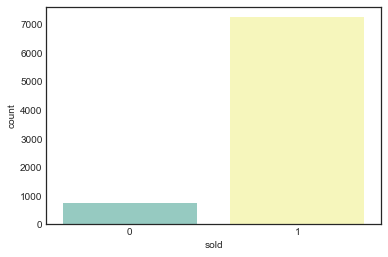

In [1059]:
# Investigating the distr of all ys
# ax = sns.countplot(x = y_train, palette = "Set3")
# ax = sns.countplot(x = y_test, palette = "Set3")
# ax = sns.countplot(x = y_valid, palette = "Set3")
ax = sns.countplot(x =y, palette = "Set3")


In [1060]:
#Running Logistic Regression

# Training the model

log_reg = LogisticRegression(random_state=15, solver = 'lbfgs', class_weight='None' )
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='None', random_state=15)

In [1061]:
# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
#gives the probabilty of an observation be 0 (left) and 1(right). If it is > 0.5 it predict 1.
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# score- Returns the mean accuracy on the given test data and labels - below

array([[-4.02511524e-05, -7.38662944e-05,  4.74971113e-06,
        -7.00405637e-03,  1.09595042e-04, -7.59626088e-04,
         4.70347694e-05,  1.28843587e-04,  2.94057621e-05,
         2.44012010e-04,  2.43818562e-04, -1.85819881e-05,
        -1.26629327e-05, -1.09979964e-04,  3.09415860e-05,
         1.75381886e-04,  2.42058131e-04, -5.76429987e-05,
         1.12775860e-04, -3.87317815e-05,  2.48148922e-04,
        -5.40046897e-05, -3.41821184e-04,  3.12877093e-04,
         1.79804760e-04, -6.04441764e-05,  1.97665596e-04,
        -2.93435778e-05, -4.12835065e-05, -2.49064857e-04,
        -1.74443025e-04, -4.15978857e-05, -7.65381955e-05,
         1.61765569e-04, -7.19015141e-05]])

In [1062]:
# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test (unseen data and we expect lower accuracy that train data)
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))

# Classification Report
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.5208193739829616
The Testing Accuracy is:  0.512749827705031
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      5204
           1       0.52      0.50      0.51      5243

    accuracy                           0.52     10447
   macro avg       0.52      0.52      0.52     10447
weighted avg       0.52      0.52      0.52     10447



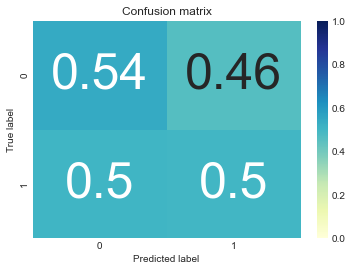

In [1063]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Visualizing Confusion Matrix 
# y_pred = np.round(y_pred)

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [1064]:
log_reg.classes_

array([0, 1])

In [1065]:
# print(y.shape[0]- y_train.sum())
# print(y_train.sum())

# print(y_test.shape[0]- y_test.sum())
# print(y_test.sum())
# df["column_name"].value_counts()

print(y.shape)
print(y.sum())
print(cm)
print(cm.sum(axis=0))
print(cm.sum(axis=1))

(7998,)
7255
[[2825 2379]
 [2627 2616]]
[5452 4995]
[5204 5243]


In [1066]:
 #Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate(main metrix)
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value(main metrix)
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)

# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)
F1 = 2*PPV*TPR/(PPV + TPR)

##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)
print("F1 score is:", F1.sum()/2)

The True Positive Rate is: [0.54285165 0.49895098]
The Precision is: [0.51815847 0.52372372]
The False positive rate is: [0.50104902 0.45714835]
The False Negative Rate is:  [0.45714835 0.50104902]

The average TPR is: 0.5209013174185031
The average Precision is: 0.5209410988391179
The average False positive rate is: 0.479098682581497
The average False Negative Rate is: 0.479098682581497
F1 score is: 0.5206275148463564


In [1067]:
#Logarithmic loss - or Log Loss - or cross-entropy loss
#an error metric
#This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks,
#defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions.
#
#Why it's important? For example, imagine having 2 models / classifiers that both predict one observation correctly
#However, 1 classifier has a predicted probability of 0.54 and the other 0.95. Which one will you choose? 
#Classification Accuracy will not help here as it will get both on 100%

# Running Log loss on training
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba))

# Running Log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Testing Dataset is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Training is:  0.692528312139355
The Log Loss on Testing Dataset is:  0.6933887493861107


In [1068]:
#Hyper Parameter Tuning
#We will loop over parameter C (Inverse of regularization strength).
#Inverse of regularization strength helps to avoid overfitting - it penalizes large values of your parameters
#It also helps to find Global Minimum by moving to better "solutions" from local minimum to global minimum
#The values of C to search should be n-equally-spaced values in log space ranging from 1e-5 to 1e5

np.geomspace(1e-5, 1e5, num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

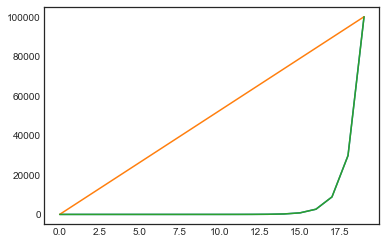

In [1069]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space
plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace

In [1070]:
# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)

#an empty list for classification accuracy
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    #we should choose c that leads to higher CA and lower log loss  

The CA of C parameter 1e-05 is 0.5082701585113715:
The Logg Loss of C parameter 1e-05 is 0.6931980453855563:

The CA of C parameter 3.359818286283781e-05 is 0.5124052377670572:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6933066211530072:

The CA of C parameter 0.00011288378916846884 is 0.512749827705031:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6933609048129968:

The CA of C parameter 0.000379269019073225 is 0.512749827705031:
The Logg Loss of C parameter 0.000379269019073225 is 0.6933801166990553:

The CA of C parameter 0.0012742749857031334 is 0.512749827705031:
The Logg Loss of C parameter 0.0012742749857031334 is 0.6933861501453517:

The CA of C parameter 0.004281332398719391 is 0.512749827705031:
The Logg Loss of C parameter 0.004281332398719391 is 0.6933879752117027:

The CA of C parameter 0.01438449888287663 is 0.512749827705031:
The Logg Loss of C parameter 0.01438449888287663 is 0.6933885210491839:

The CA of C parameter 0.04832930238571752 is 0.51

In [1071]:
# putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,0,0.000010,0.508270,0.693198
1,1,0.000034,0.512405,0.693307
2,2,0.000113,0.512750,0.693361
3,3,0.000379,0.512750,0.693380
4,4,0.001274,0.512750,0.693386
5,5,0.004281,0.512750,0.693388
6,6,0.014384,0.512750,0.693389
7,7,0.048329,0.512750,0.693389
8,8,0.162378,0.512750,0.693389
9,9,0.545559,0.512750,0.693389


In [1072]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)



The CA is: 0.5485871812543074
The Logistic Loss is:  0.6886450638324352
The optimal C parameter is:  [0.16237767]


The CA of C parameter 1e-05 is 0.5082701585113715:
The Logg Loss of C parameter 1e-05 is 0.6931980453855563:



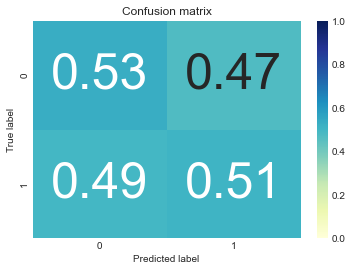

The CA of C parameter 3.359818286283781e-05 is 0.5124052377670572:
The Logg Loss of C parameter 3.359818286283781e-05 is 0.6933066211530072:



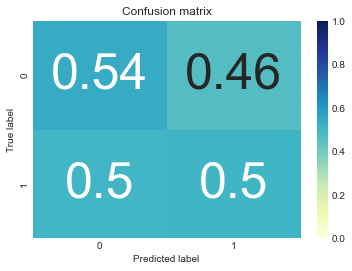

The CA of C parameter 0.00011288378916846884 is 0.512749827705031:
The Logg Loss of C parameter 0.00011288378916846884 is 0.6933609048129968:



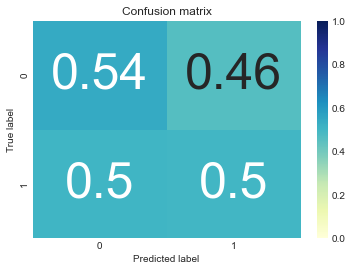

The CA of C parameter 0.000379269019073225 is 0.512749827705031:
The Logg Loss of C parameter 0.000379269019073225 is 0.6933801166990553:



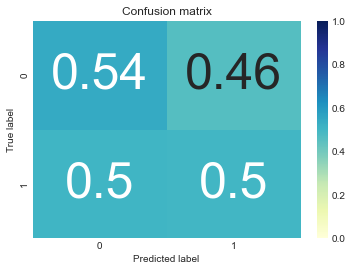

The CA of C parameter 0.0012742749857031334 is 0.512749827705031:
The Logg Loss of C parameter 0.0012742749857031334 is 0.6933861501453517:



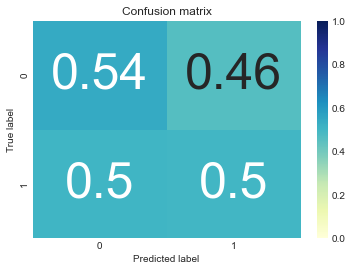

The CA of C parameter 0.004281332398719391 is 0.512749827705031:
The Logg Loss of C parameter 0.004281332398719391 is 0.6933879752117027:



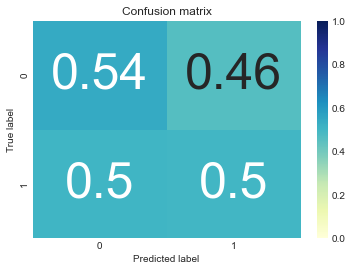

The CA of C parameter 0.01438449888287663 is 0.512749827705031:
The Logg Loss of C parameter 0.01438449888287663 is 0.6933885210491839:



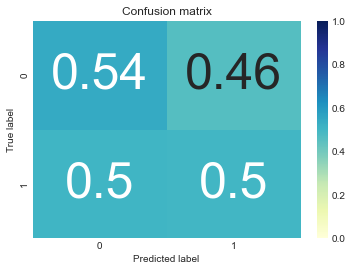

The CA of C parameter 0.04832930238571752 is 0.512749827705031:
The Logg Loss of C parameter 0.04832930238571752 is 0.693388683743859:



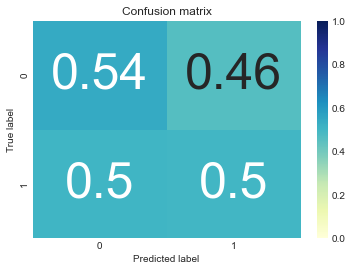

The CA of C parameter 0.1623776739188721 is 0.512749827705031:
The Logg Loss of C parameter 0.1623776739188721 is 0.6933887321882896:



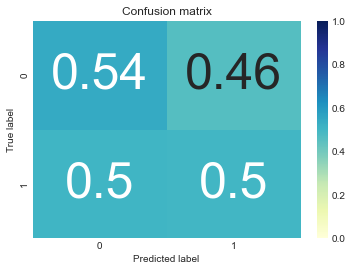

The CA of C parameter 0.5455594781168515 is 0.512749827705031:
The Logg Loss of C parameter 0.5455594781168515 is 0.69338874660903:



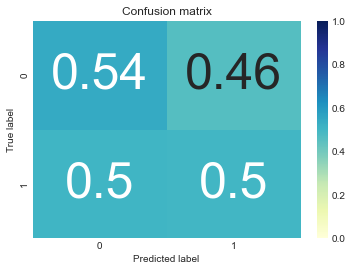

The CA of C parameter 1.8329807108324339 is 0.512749827705031:
The Logg Loss of C parameter 1.8329807108324339 is 0.6933887509012787:



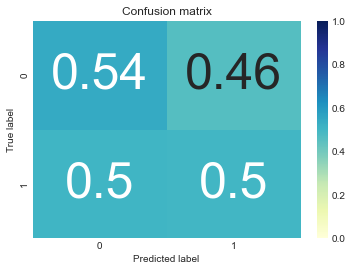

The CA of C parameter 6.1584821106602545 is 0.512749827705031:
The Logg Loss of C parameter 6.1584821106602545 is 0.6933887521787809:



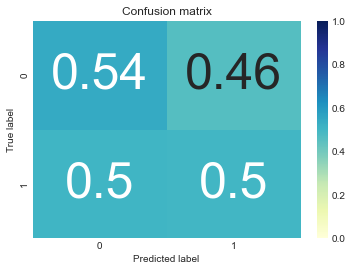

The CA of C parameter 20.6913808111479 is 0.512749827705031:
The Logg Loss of C parameter 20.6913808111479 is 0.6933887525589737:



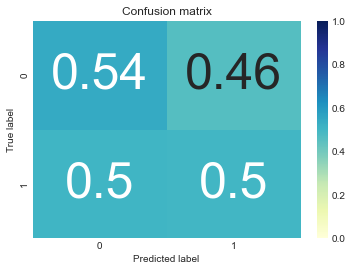

The CA of C parameter 69.51927961775606 is 0.512749827705031:
The Logg Loss of C parameter 69.51927961775606 is 0.6933887526721169:



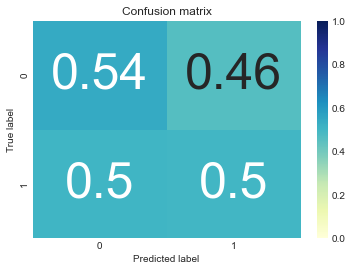

The CA of C parameter 233.57214690901213 is 0.512749827705031:
The Logg Loss of C parameter 233.57214690901213 is 0.6933887527058376:



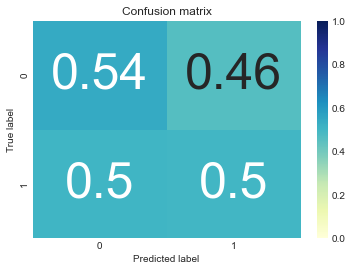

The CA of C parameter 784.7599703514607 is 0.512749827705031:
The Logg Loss of C parameter 784.7599703514607 is 0.6933887527158695:



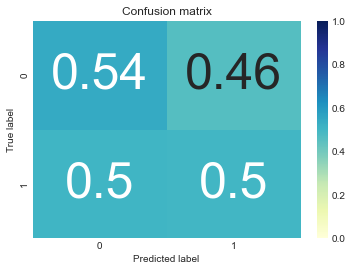

The CA of C parameter 2636.6508987303555 is 0.512749827705031:
The Logg Loss of C parameter 2636.6508987303555 is 0.6933887527188771:



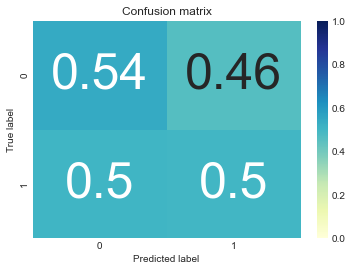

The CA of C parameter 8858.667904100832 is 0.512749827705031:
The Logg Loss of C parameter 8858.667904100832 is 0.6933887527197593:



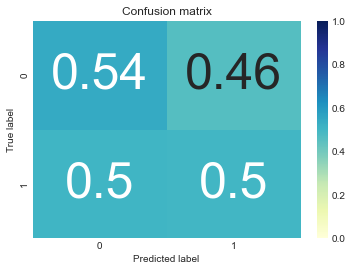

The CA of C parameter 29763.51441631313 is 0.512749827705031:
The Logg Loss of C parameter 29763.51441631313 is 0.6933887527200183:



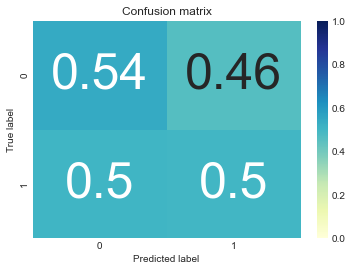

The CA of C parameter 100000.0 is 0.512749827705031:
The Logg Loss of C parameter 100000.0 is 0.6933887527200954:



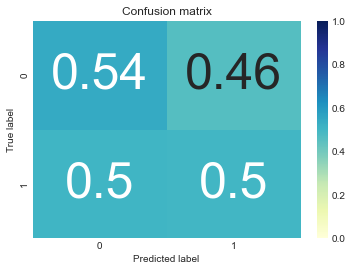

In [1073]:
#Hold-out:
# Maybe we have a different metric we want to track

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs',C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')
    plt.show()
  

In [1074]:
# Training a Dummy Classifier: compare final model to check if it overperforms dummy classifire


dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)


Testing Acc: 0.5
Log Loss: 17.269388197455342


In [1075]:
#dummy classifire her egives the same accuracy but higher log loss

In [1076]:
#Final Model with Selected Parameters
# to run on totaly unseen daat 

log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=0.0012742749857031334  )
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.5193798449612403
Log Loss: 0.6925571649443076


In [1077]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12010 entries, 0 to 12009
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AttributedEmail                   12010 non-null  int64  
 1   EmailVerified                     12010 non-null  int64  
 2   GeneratedTerms                    12010 non-null  int64  
 3   HasBureauError                    12010 non-null  int64  
 4   HasStartedPurchase                12010 non-null  int64  
 5   InboundCall                       12010 non-null  int64  
 6   InboundChat                       12010 non-null  int64  
 7   InboundEmail                      12010 non-null  int64  
 8   IsDealSeeker                      12010 non-null  int64  
 9   IsDirtLover                       12010 non-null  int64  
 10  IsDreamer                         12010 non-null  int64  
 11  IsGreen                           12010 non-null  int64  
 12  IsRe

In [1078]:

#9 ----------------------------------------------------------------------------------

#Feature Selection
# First: Making categorical variables into numeric representation

tree_data = tree_data.drop(['Contacted', 'high_credit', 'high_income'], axis=1)


print(tree_data.shape)

(7998, 44)


In [1079]:
# tree_data = tree_data.dropna().reset_index() 



In [1080]:
tree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AttributedEmail                   7998 non-null   int64  
 1   EmailVerified                     7998 non-null   int64  
 2   GeneratedTerms                    7998 non-null   int64  
 3   HasBureauError                    7998 non-null   int64  
 4   HasStartedPurchase                7998 non-null   int64  
 5   InboundCall                       7998 non-null   int64  
 6   InboundChat                       7998 non-null   int64  
 7   InboundEmail                      7998 non-null   int64  
 8   IsDealSeeker                      7998 non-null   int64  
 9   IsDirtLover                       7998 non-null   int64  
 10  IsDreamer                         7998 non-null   int64  
 11  IsGreen                           7998 non-null   int64  
 12  IsRese

In [1081]:
# Scaling our columns
# It makes my ML model tun faster and also it can (sometimes) improve the model accuracy because we normalize
#the distribution of our input

# scale_vars = ['InboundCallCount', 'InboundEmailCount', 'OutboundCallCount','OutboundEmailCount','CreditScore2',
#               'TotalInboundCallLength','DeviceCount','FraudScore', 'BureauIncome',
#               'NumberSavedVehicles', 'NumberSearches', 'UniqueModels', 'ClicksQuintile']

# scaler = MinMaxScaler()
# tree_data[scale_vars] = scaler.fit_transform(tree_data[scale_vars])
# tree_data.head()

In [1082]:
# Data Pre-Processing Phase

for column in tree_data:
    unique_vals = np.unique(tree_data[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature AttributedEmail :2 -- [0 1]
The number of values for feature EmailVerified :2 -- [0 1]
The number of values for feature GeneratedTerms :2 -- [0 1]
The number of values for feature HasBureauError :2 -- [0 1]
The number of values for feature HasStartedPurchase :2 -- [0 1]
The number of values for feature InboundCall :2 -- [0 1]
The number of values for feature InboundChat :2 -- [0 1]
The number of values for feature InboundEmail :2 -- [0 1]
The number of values for feature IsDealSeeker :2 -- [0 1]
The number of values for feature IsDirtLover :2 -- [0 1]
The number of values for feature IsDreamer :2 -- [0 1]
The number of values for feature IsGreen :2 -- [0 1]
The number of values for feature IsResearcher :2 -- [0 1]
The number of values for feature MultipleEmail :2 -- [0 1]
The number of values for feature OutboundEmail :2 -- [0 1]
The number of values for feature ReferralAttachment :2 -- [0 1]
The number of values for feature TradeInValueGenerated :2 -- 

In [1083]:
# Checking for null values
tree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7998 entries, 0 to 7997
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AttributedEmail                   7998 non-null   int64  
 1   EmailVerified                     7998 non-null   int64  
 2   GeneratedTerms                    7998 non-null   int64  
 3   HasBureauError                    7998 non-null   int64  
 4   HasStartedPurchase                7998 non-null   int64  
 5   InboundCall                       7998 non-null   int64  
 6   InboundChat                       7998 non-null   int64  
 7   InboundEmail                      7998 non-null   int64  
 8   IsDealSeeker                      7998 non-null   int64  
 9   IsDirtLover                       7998 non-null   int64  
 10  IsDreamer                         7998 non-null   int64  
 11  IsGreen                           7998 non-null   int64  
 12  IsRese

In [754]:
# tree_data =  tree_data.drop(['level_0'], axis=1)
# tree_data =  tree_data.drop(['userid'], axis=1)
# tree_data =  tree_data.drop(['attempted'], axis=1)


In [440]:
# tree_data.InboundCallContact

In [1084]:
# define X and y:
#Feature selection
y = (tree_data['sold']).astype(int) 
X = tree_data.drop('sold', axis=1).values

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X shape: (7998, 43)
y shape: (7998,)


In [1085]:

# # Imbalanced data problem
#SMOTE
## which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).

sm = SMOTE( sampling_strategy='minority')
X_res, y_res = sm.fit_resample(X, y)
y_res.value_counts()


# Spliting the data to train , test and valid set

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0, stratify=y_res)
# Number of classes in training Data
y_train.value_counts()
# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)


(10447, 43)
(2902, 43)
(1161, 43)
(10447,)
(2902,)
(1161,)


In [516]:
#Running Decision Tree
#Decision Trees are a supervised learning method used for classification and regression
#How it works:

#-The ID3 algorithm begins with the original set {S} S as the root node
#-On each iteration of the algorithm, it iterates through every unused attribute of the set and calculates the entropy 
# (or information gain) of that attribute
#It then selects the attribute which has the smallest entropy (or largest information gain) value.
#The set is then split by the selected attribute to produce subsets of the data.
#The algorithm continues to recurse on each subset, considering only attributes never selected before.

In [1086]:

dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)# random_state controles tha randomness of the variables
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [1087]:
# conda install -c anaconda python-graphviz

# import graphviz
# dot_data = tree.export_graphviz(dt, out_file =None,
#         feature_names = tree_data.drop('sold', axis=1).columns,
#         class_names = tree_data['sold'].unidue().astype(str), 
#         filled=True, rounded=True, special_characters=True)
# graph = graphviz.Souce(tree_data)
# graph
    

In [1088]:

#Running feature importance (fi as feature importance)

fi_col = []
fi = []

for i,column in enumerate(tree_data.drop('sold', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])


fi_df =zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['feature', 'Feature Importance'])
fi_df

#Ordering the Data
fi_df = fi_df.sort_values('Feature Importance', ascending =False).reset_index() 
fi_df

The feature importance for AttributedEmail is : 0.000774944567119382
The feature importance for EmailVerified is : 0.027833045048311918
The feature importance for GeneratedTerms is : 0.003635275611850951
The feature importance for HasBureauError is : 0.00037004034723760144
The feature importance for HasStartedPurchase is : 0.15150400103921532
The feature importance for InboundCall is : 0.001131077861391191
The feature importance for InboundChat is : 0.0007887512322664607
The feature importance for InboundEmail is : 0.0011811604467821405
The feature importance for IsDealSeeker is : 0.0
The feature importance for IsDirtLover is : 0.003455743478440916
The feature importance for IsDreamer is : 0.019112519343476384
The feature importance for IsGreen is : 0.0009329479327563525
The feature importance for IsResearcher is : 0.0
The feature importance for MultipleEmail is : 0.0007738133035725804
The feature importance for OutboundEmail is : 0.0308386000858174
The feature importance for ReferralA

,index,feature,Feature Importance
0,16,TradeInValueGenerated,0.353302
1,4,HasStartedPurchase,0.151504
2,36,CensusGeoRegionAddress_Midwest,0.079193
3,33,AgeCategory_45-55,0.066884
4,21,OutboundEmailCount,0.060513
5,32,AgeCategory_35-45,0.051634
6,14,OutboundEmail,0.030839
7,1,EmailVerified,0.027833
8,26,NumberSavedVehicles,0.019641
9,10,IsDreamer,0.019113


In [1089]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.9360581985258926
Testing Accuracy is:  0.9110957960027567


In [1090]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

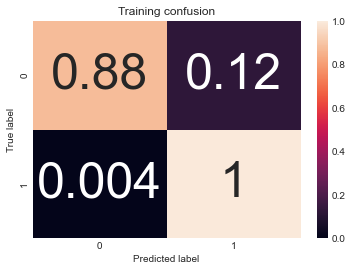

In [1091]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [1092]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[4558,  647],
       [  21, 5221]], dtype=int64)

In [1093]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)


print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)
F1 = 2*PPV*TPR/(PPV + TPR)
print("F1 score is:", F1.sum()/2)


The True Positive rate / Recall per class is:  [0.87569645 0.9959939 ]
The Precision per class is:  [0.99541385 0.88974097]
The False Alarm rate per class is:  [0.0040061  0.12430355]
The Miss Rate rate per class is:  [0.12430355 0.0040061 ]
The Classification error of each class is [0.0639418 0.0639418]
The Accuracy of each class is [0.9360582 0.9360582]

The average Recall is:  0.9358451705925062
The average Precision is:  0.9425774068898456
The average False Alarm is:  0.06415482940749381
The average Miss Rate is:  0.06415482940749381
The average Classification error is 0.0639418014741074
The average Accuracy is 0.9360581985258926
F1 score is: 0.9357996265693618


Training Accuracy is:  1.0
Testing Accuracy is:  0.9490006891798759


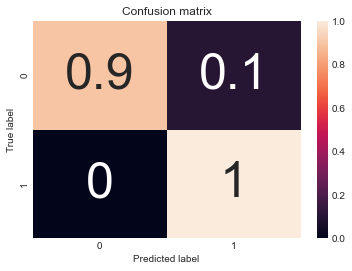

In [1094]:
#Running Random Forest

#Notes:
#Random forest is an ensemble classifier that consists of many decision trees and outputs the class 
# that is the mode of the class's output by individual trees.
#Takes the average (entropy/information gain) of many Decision Trees via bagging.
#Bagging is short for “bootstrap aggregation,” meaning that samples are chosen with replacement (bootstrapping), 
#and combined (aggregated) by taking their average

rf = RandomForestClassifier(n_estimators=100, criterion='entropy') #n_estimators is the number of trees in the forest
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)
#accuracy is 100 percent because it goes to max step means all the way down withall variables
# it improved our results but we try to tune hyper parameters now

Classification accuracy on test set with max features = auto and max_depth = 4: 0.923
Classification accuracy on test set with max features = auto and max_depth = 6: 0.939
Classification accuracy on test set with max features = auto and max_depth = 10: 0.946
Classification accuracy on test set with max features = auto and max_depth = 15: 0.948
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.923
Classification accuracy on test set with max features = sqrt and max_depth = 6: 0.939
Classification accuracy on test set with max features = sqrt and max_depth = 10: 0.946
Classification accuracy on test set with max features = sqrt and max_depth = 15: 0.948
Classification accuracy on test set with max features = log2 and max_depth = 4: 0.926
Classification accuracy on test set with max features = log2 and max_depth = 6: 0.939
Classification accuracy on test set with max features = log2 and max_depth = 10: 0.946
Classification accuracy on test set with max feat

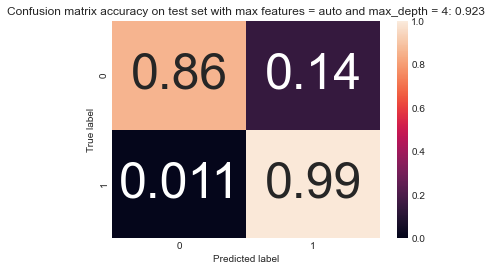

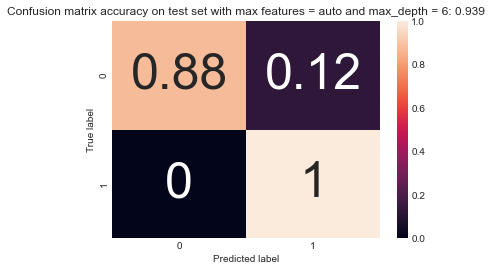

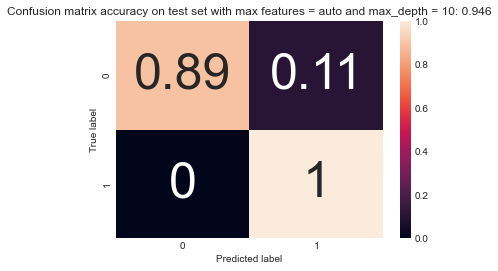

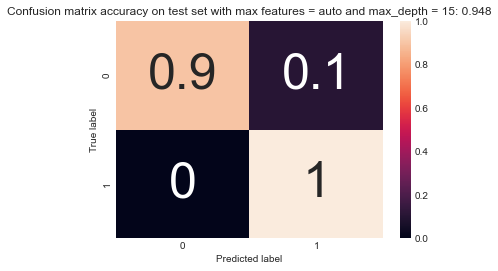

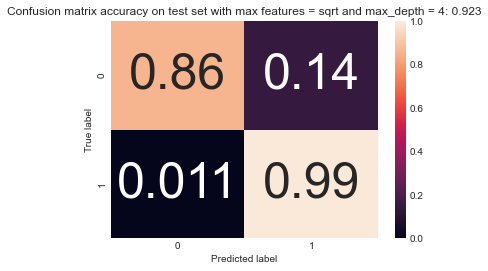

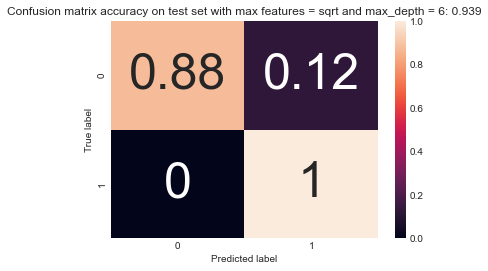

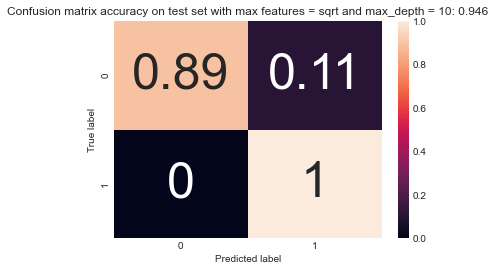

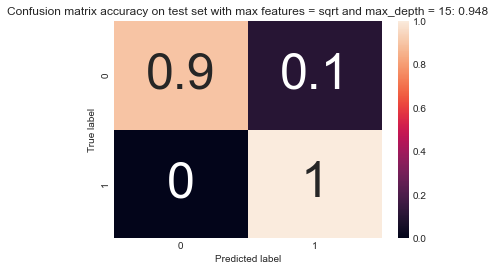

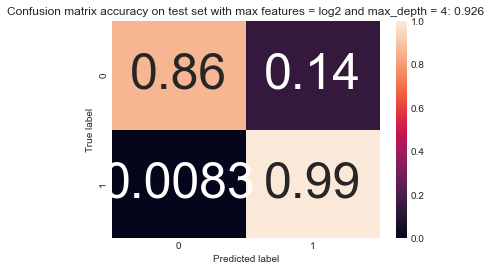

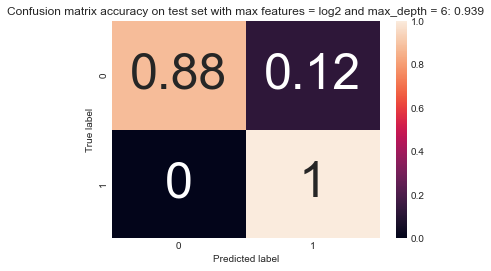

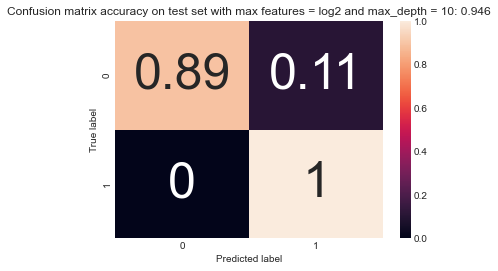

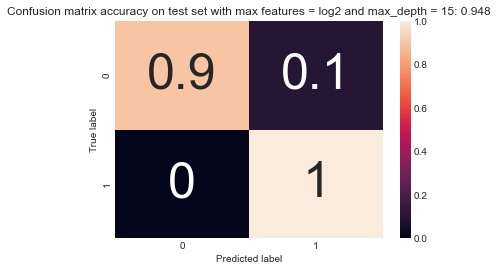

In [1096]:
# Tunning Random Forest

n_estimators = 100  #number of decision trees to run per combination
max_features = ['auto', 'sqrt', 'log2'] # 1 is the number of features when looking for the best split
max_depths = [4, 6, 10, 15] # to avid overfitting
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations f for max_feature and d for max_depths
    rf = RandomForestClassifier(n_estimators=n_estimators, #is 100
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2, 
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))


In [1097]:
 final_model = RandomForestClassifier(n_estimators= 100,criterion='entropy', max_features='log2',
                             max_depth=4, n_jobs=2, random_state=1337)
    
final_model.fit(X_train, y_train)
prediction_test = final_model.predict(X=X_test)

Training Accuracy is:  0.9754953575189049
Testing Accuracy is:  0.9479669193659546


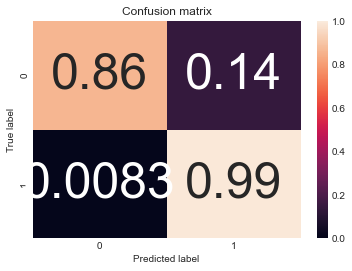

In [1098]:
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

In [90]:
##########################################################

In [67]:
# pip install xgboost

In [68]:
import sys

sys.path.append('/home/ubuntu/src/xgboost/python-package')
sys.path



['C:\\Users\\mehrn',
 'C:\\Users\\mehrn\\anaconda3\\python39.zip',
 'C:\\Users\\mehrn\\anaconda3\\DLLs',
 'C:\\Users\\mehrn\\anaconda3\\lib',
 'C:\\Users\\mehrn\\anaconda3',
 '',
 'C:\\Users\\mehrn\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\mehrn\\anaconda3\\lib\\site-packages',
 'C:\\Users\\mehrn\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\mehrn\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\mehrn\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\mehrn\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\mehrn\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\mehrn\\.ipython',
 '/home/ubuntu/src/xgboost/python-package']

In [533]:
import xgboost as xgb


In [534]:
#############################################
#XGBoost

#XGBoost is short for “eXtreme Gradient Boosting.”
#It is an ensemble model; ensemble models combines different machine learning models into one
#Instead of aggregating predictions, boosters turn weak learners into strong learners by focusing on where 
#the individual models went wrong
#XGBoost trains upon the residuals. Instead of aggregating trees, gradient boosted trees learns from errors 
#during each boosting round

from sklearn.model_selection import RandomizedSearchCV
import xgboost

y = tree_data['sold'].values # Target vector
X = tree_data.drop('sold', axis=1).values# Input features (attributes)


# Search through hyper parameters to get the best combination 
classifier=xgboost.XGBClassifier(tree_method='gpu_hist')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}


clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X,y)

# best parameters
# clf.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[12:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=nan total time=   0.0s
[12:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=nan total time=   0.0s
[12:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:223: No visible GPU is found, setting `gpu_id` to -1
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=5;, score=nan total time=   0.0s
[12:47:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:223: No vi

XGBoostError: [12:47:19] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/gbm/gbtree.cc:588: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

In [1099]:
# Deploy on our data and predict 
#Creat new dataframe
data = pd.DataFrame(customer_hist.merge(call_hist, how='left', left_on='PhoneNumber_hashed', right_on='PhoneNumber_hashed'))
data.shape

(12010, 55)

In [1100]:
data.isna().sum()

userid                        0
AttributedEmail               0
EmailVerified                 0
GeneratedTerms                0
HasBureauError                0
HasStartedPurchase            0
InboundCall                   0
InboundChat                   0
InboundEmail                  0
IsDealSeeker                  0
IsDirtLover                   0
IsDreamer                     0
IsGreen                       0
IsResearcher                  0
MultipleEmail                 0
OutboundEmail                 0
ReferralAttachment            0
TradeInValueGenerated         0
InboundCallCount              0
InboundChatCount              0
InboundEmailCount             0
OutboundCallCount             0
OutboundEmailCount            0
TotalInboundCallLength        0
BureauIncome                  0
CreditScore1                  0
CreditScore2                  0
DeviceCount                   0
FraudScore                    0
Income                        0
MedianVehicleFuelEcon         0
MedianVe

In [1101]:
data.shape

(12010, 55)

In [1102]:
#removing observations that we attempted before to contact
data = data.loc[data["Contacted"].isna() == True]
data.shape

(4012, 55)

In [1104]:
unseen_data = data

In [1105]:
#Apply the same pre_prossecing  stages
# dummy variables
data= pd.get_dummies(data, columns = ['AgeCategory',  'CensusGeoRegionAddress', 'LeadSource'])
df=data
# data=df

In [1106]:

# Limiting the data

data = data.drop(['userid', 'MedianVehicleFuelEcon', 'MedianVehicleMileage', 'TradeInValueAmount','InboundCallContact',
        'ModeDeviceType', 'ModeVehicleType', 'PhoneType', 'ServiceProvider','accountcreationdatetime', 'TotalInboundCallLength',
        'PhoneNumber_hashed','OBCallDateTime', 'advocate_id', 'CallDuration', 'MedianVehiclePrice','Income', 'CreditScore1', 
              'VehicleVelocity1', 'VehicleVelocity15', 'CreditScore1', 'Income', 'InboundCallContact'], axis=1)


In [1107]:

# scaling

scale_vars = ['InboundCallCount', 'InboundEmailCount', 'OutboundCallCount','OutboundEmailCount','CreditScore2',
              'DeviceCount','FraudScore', 'BureauIncome',
              'NumberSavedVehicles', 'NumberSearches', 'UniqueModels', 'ClicksQuintile']




scaler = MinMaxScaler()
data[scale_vars] = scaler.fit_transform(data[scale_vars])
data.head()

,AttributedEmail,EmailVerified,GeneratedTerms,HasBureauError,HasStartedPurchase,InboundCall,InboundChat,InboundEmail,IsDealSeeker,IsDirtLover,...,AgeCategory_45-55,AgeCategory_55-65,AgeCategory_65+,CensusGeoRegionAddress_Midwest,CensusGeoRegionAddress_Northeast,CensusGeoRegionAddress_South,CensusGeoRegionAddress_West,LeadSource_ThirdPartyFinancing,LeadSource_ThirdPartyListing,LeadSource_Website
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [1108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4012 entries, 0 to 12007
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AttributedEmail                   4012 non-null   int64  
 1   EmailVerified                     4012 non-null   int64  
 2   GeneratedTerms                    4012 non-null   int64  
 3   HasBureauError                    4012 non-null   int64  
 4   HasStartedPurchase                4012 non-null   int64  
 5   InboundCall                       4012 non-null   int64  
 6   InboundChat                       4012 non-null   int64  
 7   InboundEmail                      4012 non-null   int64  
 8   IsDealSeeker                      4012 non-null   int64  
 9   IsDirtLover                       4012 non-null   int64  
 10  IsDreamer                         4012 non-null   int64  
 11  IsGreen                           4012 non-null   int64  
 12  IsRes

In [1109]:
# Contacted                           
#drop na s
data = data.drop(['Contacted'], axis=1)


In [1110]:
pred_rf = final_model.predict(data.values)
pred_prob_rf = final_model.predict_proba(data.values)

pred_rf
    
 

array([1, 1, 1, ..., 1, 1, 1])

In [1111]:
#Probability of the first Customer to not buy a car (left) and to buy a car(right)
pred_prob_rf

array([[0.26684481, 0.73315519],
       [0.33878266, 0.66121734],
       [0.45021319, 0.54978681],
       ...,
       [0.43493009, 0.56506991],
       [0.29482794, 0.70517206],
       [0.3533215 , 0.6466785 ]])

In [1112]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_rf, 1)

[0.733155190367474,
 0.6612173401327159,
 0.5497868060988347,
 0.5685953402014402,
 0.6998326296297844,
 0.5882593158625516,
 0.6466382636828368,
 0.6824848942223996,
 0.5348081564594173,
 0.6538802062621538,
 0.5928457097701365,
 0.6462167114213423,
 0.6279941979051216,
 0.577743655056346,
 0.5639475981277555,
 0.7050291063603648,
 0.6554287021769964,
 0.6177417504880452,
 0.5980505308437982,
 0.6454538180445942,
 0.594978915755632,
 0.6716519989274778,
 0.531224676688139,
 0.6244067937267458,
 0.5752581565928313,
 0.5956747452150919,
 0.5864306128684127,
 0.6165153970922232,
 0.5831706839191709,
 0.5838061564285839,
 0.5067365653514863,
 0.6547796232551423,
 0.6067338803924502,
 0.6201341880981193,
 0.612220782869334,
 0.7309597603843726,
 0.6200648481243022,
 0.6941268137820993,
 0.625221645672795,
 0.5919376070837077,
 0.7132480660871157,
 0.5541823525719262,
 0.5164273578843087,
 0.6414322088980147,
 0.6993346572416934,
 0.5620294082597931,
 0.6987308906538432,
 0.6196306134326767

In [1113]:

output = unseen_data.copy()
output['Predictions - buy or Not'] = pred_rf
output['Predictions - Probability to buy'] = column(pred_prob_rf, 1)
output['Predictions - Contact or Not Desc'] = 'Empty'
output['Predictions - Contact or Not Desc'][output['Predictions - buy or Not'] == 0] = 'not attempt'
output['Predictions - Contact or Not Desc'][output['Predictions - buy or Not'] == 1] = 'attempt'
output.head()



,userid,AttributedEmail,EmailVerified,GeneratedTerms,HasBureauError,HasStartedPurchase,InboundCall,InboundChat,InboundEmail,IsDealSeeker,...,accountcreationdatetime,PhoneNumber_hashed,MedianVehicleMileage,OBCallDateTime,Contacted,advocate_id,CallDuration,Predictions - buy or Not,Predictions - Probability to buy,Predictions - Contact or Not Desc
0,1,0,0,1,0,1,0,0,0,0,...,05FEB2018:13:48:45.56,NaN,36469.370904,NaN,NaN,NaN,NaN,1,0.733155,attempt
5,6,0,1,1,0,1,0,0,0,0,...,04FEB2018:20:07:09.99,B00BB1B36010F2791437088BCEA38EE0E3BBAF7C3455F7...,40249.236888,NaN,NaN,NaN,NaN,1,0.661217,attempt
6,7,0,0,0,0,0,0,0,0,0,...,26MAR2018:08:58:23.78,8854B1F082B0FC1785928EBA19F7B862F67DFD133B91BD...,33113.351930,NaN,NaN,NaN,NaN,1,0.549787,attempt
12,13,0,0,1,0,0,0,0,0,0,...,17APR2018:19:59:23.99,NaN,29221.735512,NaN,NaN,NaN,NaN,1,0.568595,attempt
13,14,0,1,0,0,0,0,0,0,0,...,29JAN2018:17:29:38.43,NaN,43066.539136,NaN,NaN,NaN,NaN,1,0.699833,attempt


In [1114]:
output = output.sort_values(by=['Predictions - Probability to buy'], ascending=False,)
output

,userid,AttributedEmail,EmailVerified,GeneratedTerms,HasBureauError,HasStartedPurchase,InboundCall,InboundChat,InboundEmail,IsDealSeeker,...,accountcreationdatetime,PhoneNumber_hashed,MedianVehicleMileage,OBCallDateTime,Contacted,advocate_id,CallDuration,Predictions - buy or Not,Predictions - Probability to buy,Predictions - Contact or Not Desc
9798,500,0,0,0,0,0,0,0,0,0,...,19MAR2018:08:43:09.05,DEAE95B3C804E6E47E8B8645283A66979EE3367D464093...,48146.798703,NaN,NaN,NaN,NaN,1,0.817846,attempt
4555,2759,1,0,0,1,1,0,0,0,0,...,04MAR2018:07:28:50.05,B73E5E078BC6F45B1ED479BC65F996CC6CEC35642CEC9E...,50244.766027,NaN,NaN,NaN,NaN,1,0.799821,attempt
8464,9379,0,1,1,0,1,0,0,0,0,...,10MAR2018:07:11:57.32,D6B024BDD60FD7418CBE02DE118EF116FB163EEB9BA4DB...,32464.329823,NaN,NaN,NaN,NaN,1,0.799557,attempt
8197,8903,0,0,0,0,1,0,0,0,0,...,11JAN2018:10:51:18.95,NaN,32108.009262,NaN,NaN,NaN,NaN,1,0.798982,attempt
3651,1231,0,1,1,0,1,1,0,1,0,...,28APR2018:08:04:04.98,FB009283D37CE7B15B311E3A1838D54F90D60A709B517A...,39964.116126,NaN,NaN,NaN,NaN,1,0.795777,attempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,1579,0,0,1,0,0,0,0,0,0,...,28FEB2018:05:14:38.77,NaN,34056.607128,NaN,NaN,NaN,NaN,0,0.484078,not attempt
545,3462,0,0,1,0,0,0,0,0,0,...,31MAR2018:03:47:10.61,69821814D59C8D7959E4684070B5B62400DDA3E5863B07...,45199.389210,NaN,NaN,NaN,NaN,0,0.481442,not attempt
7149,6605,0,0,1,0,0,0,0,0,0,...,10FEB2018:05:50:07.28,NaN,38731.754138,NaN,NaN,NaN,NaN,0,0.476921,not attempt
9135,10259,0,0,0,0,0,0,0,0,0,...,23APR2018:12:25:07.02,FAD038B80E3E8B038C068A86ED78BA1853630572AB984E...,32999.730952,NaN,NaN,NaN,NaN,0,0.468602,not attempt


In [1115]:

# summm = output.groupby['Predictions - buy or Not'].sum() 
summ = output['Predictions - buy or Not'].sum().astype(int)
print(summ)

3972


In [1119]:
tree_data.to_csv(r'C:\Users\mehrn\OneDrive\Desktop\Mehrnoosh-Carvana\tree_data.csv')
new_data.to_csv(r'C:\Users\mehrn\OneDrive\Desktop\Mehrnoosh-Carvana\new_data.csv')
ttest_data.to_csv(r'C:\Users\mehrn\OneDrive\Desktop\Mehrnoosh-Carvana\t_test.csv')
df.to_csv(r'C:\Users\mehrn\OneDrive\Desktop\Mehrnoosh-Carvana\df.csv')
output.to_csv(r'C:\Users\mehrn\OneDrive\Desktop\Mehrnoosh-Carvana\output.csv')